In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import seed
from random import randrange
import matplotlib.pyplot as plt
%matplotlib inline

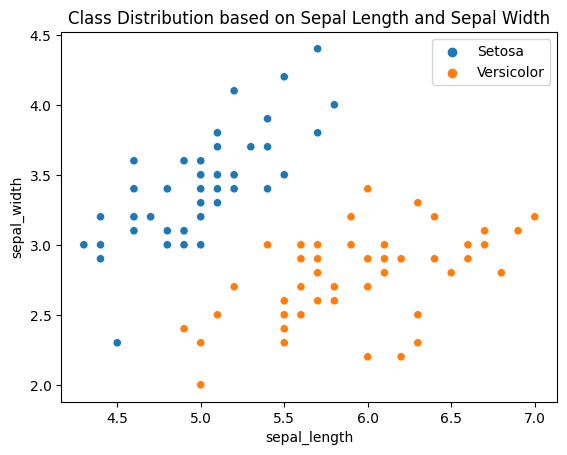

In [2]:
iris = pd.read_csv('iris.csv')
#only keep required fields
iris = iris.loc[iris['variety'] != 'Virginica', ['sepal_length', 'sepal_width', 'variety']]
# code classes 
iris['variety'] = iris['variety'].map(lambda x: 0 if x=='Setosa' else 1)

# plot class distribution
ax = sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='variety')
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Setosa', 'Versicolor'], loc='upper right');
ax.set_title('Class Distribution based on Sepal Length and Sepal Width')
ax.plot();

In [3]:
# normalize data as it is a good practice for the perceptron algorithm
iris['sepal_width'] = (iris['sepal_width'] - iris['sepal_width'].mean()) / iris['sepal_width'].std()
iris['sepal_length'] = (iris['sepal_length'] - iris['sepal_length'].mean()) / iris['sepal_length'].std()
iris['variety'] = iris['variety'].astype(int)

In [4]:
def split_data(df):
    # Shuffle dataset 
    shuffle_df = df.sample(frac=1)
    
    train_size = int(0.90* len(df))
    
    train = shuffle_df.iloc[:train_size,:].reset_index(drop=True)
    test = shuffle_df.iloc[train_size:,:].reset_index(drop=True)
    return train.values, test.values

In [5]:
# Make a prediction with weights
def predict(sample, weights):
    activation = weights[0]
    for i in range(len(sample)-1):
        activation += weights[i + 1] * sample[i]
    return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, alpha, epochs):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(epochs):
        error_sum = 0.0
        for sample in train:
            pred = predict(sample, weights)
            error = sample[-1] - pred
            error_sum += error**2
            weights[0] = weights[0] + alpha * error
            for i in range(len(sample)-1):
                weights[i + 1] = weights[i + 1] + alpha * error * sample[i]
        print('epoch = %d, error = %.3f' % (epoch, error_sum))
    return weights

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(test):
    correct = 0
    for sample in test:
        predicted = predict(sample, weights)
        if sample[-1] == predicted:
            correct += 1
    return correct / float(len(test)) * 100.0

In [6]:
learning_rate = 0.01
n_epoch = 10
train , test = split_data(iris)
weights = train_weights(train, learning_rate, n_epoch)
accuracy = evaluate_algorithm(test)
print('test acuracy: %s' % accuracy)

epoch = 0, error = 5.000
epoch = 1, error = 2.000
epoch = 2, error = 2.000
epoch = 3, error = 0.000
epoch = 4, error = 0.000
epoch = 5, error = 0.000
epoch = 6, error = 0.000
epoch = 7, error = 0.000
epoch = 8, error = 0.000
epoch = 9, error = 0.000
test acuracy: 100.0


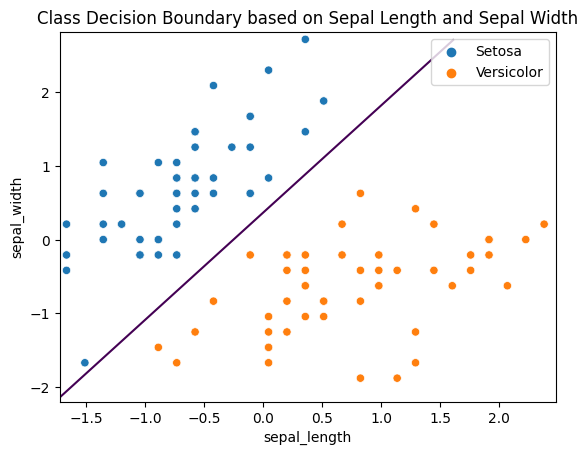

In [7]:
#200 points with vlaues between -1 and 1 are created
x1 = np.linspace(iris['sepal_length'].min(), iris['sepal_length'].max(), 200)
x2 = np.linspace(iris['sepal_width'].min(), iris['sepal_width'].max(), 200)
#the mesh grid of the points is created to be used for calculating decision boundary line equation
X1, X2 = np.meshgrid(x1, x2)

# build line equation
f = weights[0] + (weights[1] * X1) + (weights[2] * X2)
    
# data points are plotted
ax = sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='variety')
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Setosa', 'Versicolor'], loc='upper right');
ax.plot();
ax.axis(ymin=iris['sepal_width'].min()+0.1,ymax=iris['sepal_width'].max()+0.1)
ax.axis(xmin=iris['sepal_length'].min()+0.1, xmax=iris['sepal_length'].max()+0.1)
ax.set_title('Class Decision Boundary based on Sepal Length and Sepal Width')
# contour of f is create and plotted on data points
plt.contour(X1,X2,f, [0])
plt.show()

In [8]:
print('Sepal length weight:  ', weights[1])
print(' Sepal width weight: ', weights[2])
print('  Width from origin:  ', weights[0])

Sepal length weight:   0.039411041254538606
 Sepal width weight:  -0.027133789872664543
  Width from origin:   0.01
